In [94]:
import requests
from bs4 import BeautifulSoup

names_name = []
cmp_values = []
a = []
market_cap=[]
Sales_Qtr=[]


# Step 1: Download and save each page
for i in range(1, 10):
    url = f"https://www.screener.in/screens/71064/all-stocks/?page={i}"
    response = requests.get(url)
    with open(f"Stocks_data/page{i}.html", "w", encoding="utf-8") as f:
        f.write(response.text)
        print(f"Downloaded page {i}")

# Step 2: Read saved pages and extract data
for i in range(1, 10):
    with open(f"Stocks_data/page{i}.html", encoding="utf-8") as f:
        content = f.read()

    soup = BeautifulSoup(content, "html.parser")
    box = soup.find("div", class_="responsive-holder fill-card-width")

    if box:
        names=box.find_all("a",target="_blank")
        stockdata = box.find_all("tr", attrs={"data-row-company-id": True})
        
        for i in names:
            names_name.append(i.text.strip())
            
        for i in stockdata:
            tds = i.find_all("td")
            if len(tds) >= 4:
                
                cmp_value = tds[2].text.strip()
                pe_ratio = tds[3].text.strip()
                marketcap=tds[4].text.strip()
                SalesQtr=tds[8].text.strip()

                cmp_values.append(cmp_value)
                a.append(pe_ratio)
                market_cap.append(marketcap)
                Sales_Qtr.append(SalesQtr)
                
                
# Step 3: Create DataFrame
import pandas as pd

min_len = min(len(names_name), len(cmp_values), len(a))
df = pd.DataFrame({
    "Stock Name": names_name[:min_len],
    "Stock CMP": cmp_values[:min_len],
    "P/E Ratio": a[:min_len],
    "MarketCap": market_cap[:min_len],
    "Sales QTR": Sales_Qtr[:min_len]

})

print(df)


Downloaded page 1
Downloaded page 2
Downloaded page 3
Downloaded page 4
Downloaded page 5
Downloaded page 6
Downloaded page 7
Downloaded page 8
Downloaded page 9
           Stock Name Stock CMP P/E Ratio MarketCap Sales QTR
0         Maruti Sec.     49.85      1.92     24.93      0.00
1      Monotype India      0.71      3.97     49.92     13.55
2         Prime Urban     10.44     22.25     27.82      3.45
3    Varyaa Creations     58.43      9.27     27.99     15.33
4       IMEC Services     79.59      0.60     15.13     24.87
..                ...       ...       ...       ...       ...
220        Tata Elxsi   6631.50     52.62  41326.67    908.34
221            Winsol    206.95     21.05    238.72     68.78
222  Jai Balaji Inds.    105.54     17.26   9626.47   1589.53
223              Amal    633.35     26.73    782.98     38.96
224           Sunlite    175.95     13.41    191.43    759.92

[225 rows x 5 columns]


In [96]:
df.to_csv("Stocks.csv",index=False)

In [98]:
df.head()

,Stock Name,Stock CMP,P/E Ratio,MarketCap,Sales QTR
0,Maruti Sec.,49.85,1.92,24.93,0.00
1,Monotype India,0.71,3.97,49.92,13.55
2,Prime Urban,10.44,22.25,27.82,3.45
3,Varyaa Creations,58.43,9.27,27.99,15.33
4,IMEC Services,79.59,0.60,15.13,24.87


In [100]:
df.describe()

,Stock Name,Stock CMP,P/E Ratio,MarketCap,Sales QTR
count,225,225,225,225,225
unique,225,225,220,225,217
top,Maruti Sec.,49.85,,24.93,0.00
freq,1,1,3,1,8


<Axes: xlabel='Stock CMP', ylabel='Stock Name'>

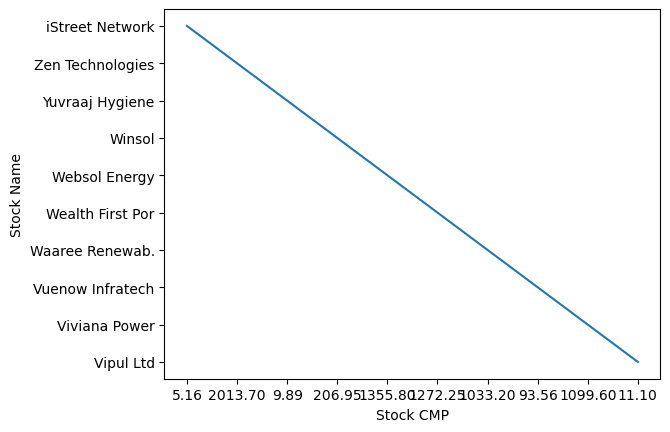

In [123]:
import seaborn as sns
import matplotlib.pyplot as plt

a = df.sort_values(by="Stock Name", ascending=False).head(10)
sns.lineplot(x="Stock CMP", y="Stock Name", data=a)


([<matplotlib.patches.Wedge at 0x171d42b4410>,
 [Text(1.0997168098709336, 0.024958727677854623, 'Shri Gang Indus'),
  Text(1.0600764472134838, 0.2936629463572789, 'Afcom'),
  Text(-1.0020716767306501, 0.45370954882416104, 'Gillette India'),
  Text(0.47594072505379614, -0.9917058163766445, 'Alpex Solar'),
  Text(0.8536416520531408, -0.6937549494453965, 'Life Insurance'),
  Text(0.9941237823248882, -0.47086930821201195, 'Vuenow Infratech'),
  Text(1.0757093169500933, -0.2298901159831884, 'PNGS Gargi FJ')])

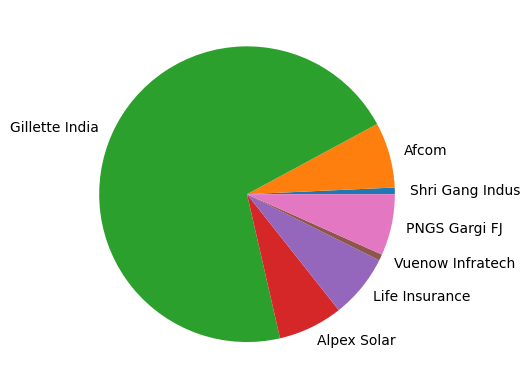

In [139]:
import matplotlib.pyplot as plt

top5 = df.sort_values(by="Stock CMP", ascending=False).head(7)
plt.pie(top5["Stock CMP"], labels=top5["Stock Name"], )

